In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv file
tt= pd.read_csv('titanic_train.csv')
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# checking shape
tt.shape

(891, 12)

In [4]:
# checking data type
tt.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# checking null value
tt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

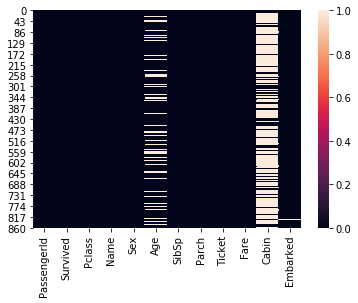

In [6]:
# heatmap of null value
import seaborn as sns
sns.heatmap(tt.isnull())

In [7]:
# removing the null value
tt['Age'].fillna(tt['Age'].mean(), inplace = True)
tt = tt.dropna(subset=['Embarked'])
tt['Cabin'] = tt['Cabin'].fillna('NaN')

In [8]:
# checking null value
tt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

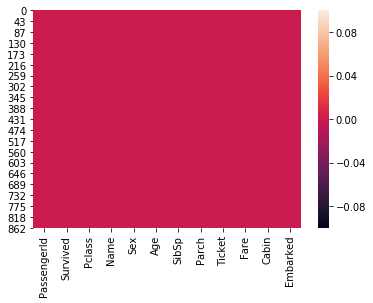

In [9]:
# heatmap of null value
import seaborn as sns
sns.heatmap(tt.isnull())

In [10]:
# checking the data description
tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# coloum names
tt.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [13]:
# corelation between coloums
tt.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


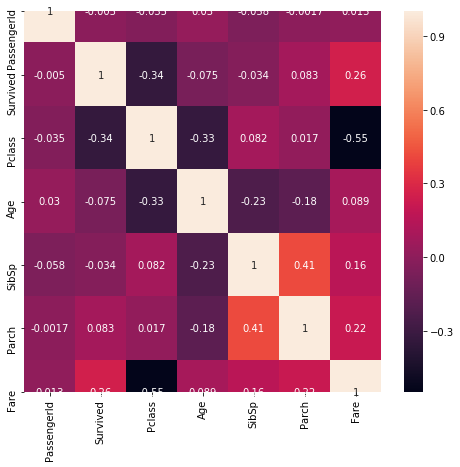

In [14]:
# heat map of corelation
corr_hmap=tt.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)

Visualizing the data

PassengerId        AxesSubplot(0.125,0.71587;0.227941x0.16413)
Survived        AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Pclass          AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Age               AxesSubplot(0.125,0.518913;0.227941x0.16413)
SibSp          AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Parch          AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Fare              AxesSubplot(0.125,0.321957;0.227941x0.16413)
dtype: object

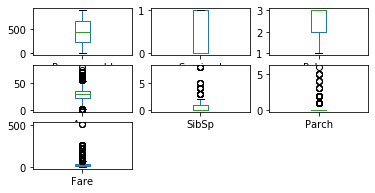

In [15]:
tt.plot(kind='box',subplots=True,layout=(4,3))

In [16]:
#sns.pairplot(tt)

Total people survived is: 340 

Number of Females who survived: 231 
Percentage of Females who survived: 0.6794117647058824 

Number of Males who survived: 109 
Percentage of Males who survived: 0.3205882352941177 



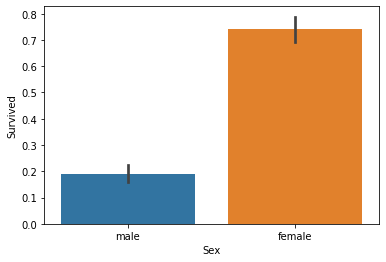

In [17]:
# data comparision of male and female surviver
sns.barplot(x='Sex', y='Survived', data=tt)

female_survived = tt[tt.Sex == 'female']['Survived'].sum()
male_survived = tt[tt.Sex == 'male']['Survived'].sum()

print('Total people survived is:',((female_survived + male_survived)),'\n')
print('Number of Females who survived:',female_survived,'\nPercentage of Females who survived:',female_survived/(female_survived + male_survived),'\n') 
print('Number of Males who survived:', male_survived,'\nPercentage of Males who survived:', male_survived/(female_survived + male_survived),'\n')

Total people survived is: 340 

Number of Class 1 Passengers who survived: 134 
Percentage of Class 1 Passengers who survived: 0.3941176470588235 

Number of Class 2 Passengers who survived: 87 
Percentage of Class 2 Passengers who survived: 0.25588235294117645 

Number of Class 3 Passengers who survived: 119 
Percentage of Class 3 Passengers who survived: 0.35 



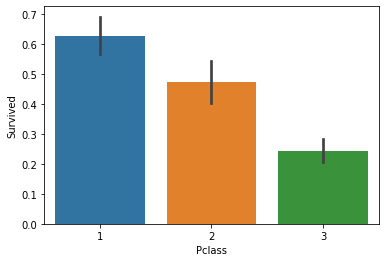

In [18]:
# data comparision by passengers class of surviver
sns.barplot(x='Pclass', y='Survived', data=tt)

Class_1 = tt[tt.Pclass == 1]['Survived'].sum()
Class_2 = tt[tt.Pclass == 2]['Survived'].sum()
Class_3 = tt[tt.Pclass == 3]['Survived'].sum()
survived = Class_1 + Class_2 + Class_3

print('Total people survived is:',(survived),'\n')
print('Number of Class 1 Passengers who survived:',Class_1,'\nPercentage of Class 1 Passengers who survived:',Class_1/survived,'\n') 
print('Number of Class 2 Passengers who survived:',Class_2,'\nPercentage of Class 2 Passengers who survived:',Class_2/survived,'\n')
print('Number of Class 3 Passengers who survived:',Class_3,'\nPercentage of Class 3 Passengers who survived:',Class_3/survived,'\n')

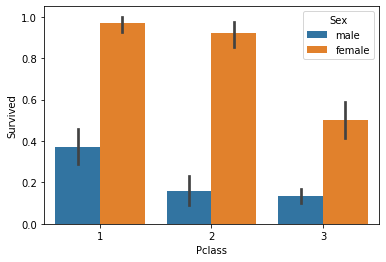

In [19]:
# data comparision by passengers class of male and female surviver
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=tt)

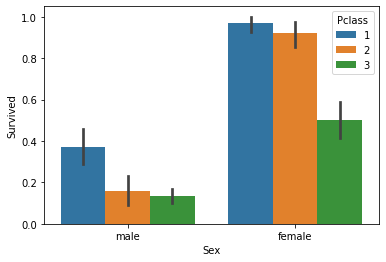

In [20]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=tt)

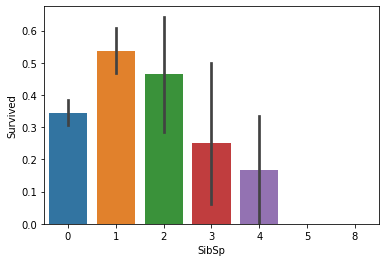

In [21]:
# data comparision of sibling and spouse vs surviver
sns.barplot(x='SibSp', y='Survived', data=tt)

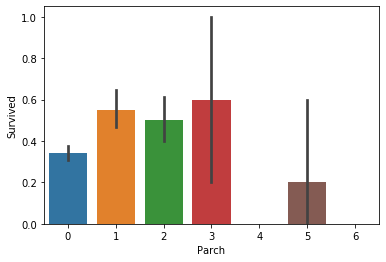

In [22]:
sns.barplot(x='Parch', y='Survived', data=tt)

In [23]:
#sns.barplot(x='Fare', y='Survived', data=tt)

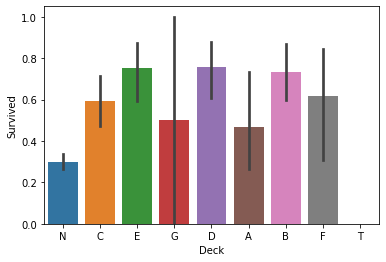

In [24]:
# Extracting tital from cabin and converting it into numeric form
tt['Deck']=tt['Cabin'].str.get(0)
# data comparision of Deck vs surviver
sns.barplot(x='Deck', y='Survived', data=tt)

In [25]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,N


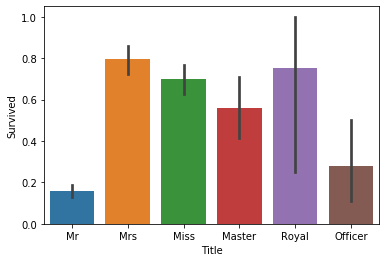

In [26]:
# Extracting tital from name coloum and converting it into numeric form
tt['Title'] = tt['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
title = {}
title.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royal'))
title.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title.update(dict.fromkeys(['Mr'], 'Mr'))
title.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
tt['Title'] = tt['Title'].map(title)

# data comparision of title vs surviver

sns.barplot(x='Title', y='Survived', data=tt)

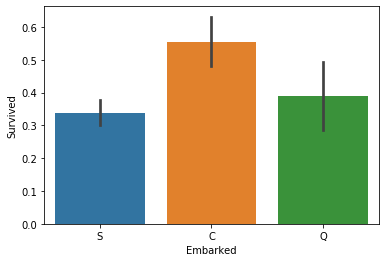

In [27]:
sns.barplot(x='Embarked', y='Survived', data=tt)

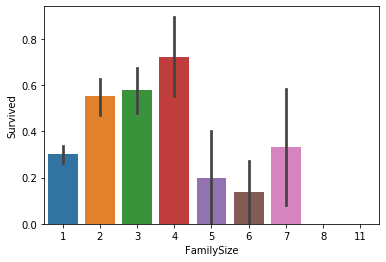

In [28]:
# creating family size using parch and sibsp
tt['FamilySize'] = tt['SibSp'] + tt['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=tt)

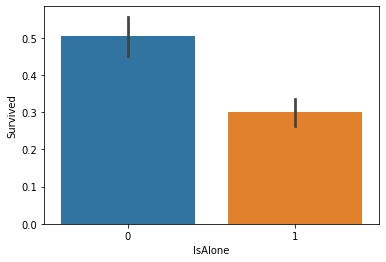

In [29]:
# visulasing who is along using familysize
tt['IsAlone'] = tt.FamilySize.apply(lambda x: 1 if x == 1 else 0)
sns.barplot(x='IsAlone', y='Survived', data=tt)

In [30]:
encoded_data=pd.get_dummies(tt[['Pclass','Sex', 'SibSp','Parch','Embarked','Deck','Title','FamilySize','IsAlone']])
encoded_data[['Age', 'Fare']]=tt[['Age', 'Fare']]
encoded_data.sample(5)

,Pclass,SibSp,Parch,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Deck_N,Deck_T,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal,Age,Fare
544,1,1,0,2,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,50.000000,106.425
133,2,1,0,2,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,29.000000,26.000
605,3,1,0,2,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,36.000000,15.550
438,1,1,4,6,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,64.000000,263.000
87,3,0,0,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,29.699118,8.050


In [31]:
# dividing dataset into input values 'x' and output value 'y'
x=encoded_data
x.head()

,Pclass,SibSp,Parch,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Deck_N,Deck_T,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal,Age,Fare
0,3,1,0,2,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,22.0,7.2500
1,1,1,0,2,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,38.0,71.2833
2,3,0,0,1,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,26.0,7.9250
3,1,1,0,2,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,35.0,53.1000
4,3,0,0,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,35.0,8.0500


In [32]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

In [33]:
y=tt['Survived'] 
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
# function to find the maximum accuracy score against random state
def M_acc(model):
    max_acc_score=0
    for acc in range(10,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=acc)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
    
        accuracy=accuracy_score(test_y,pred)
        if accuracy>max_acc_score:
            max_acc_score=accuracy
            final_acc_state=acc
    
    return final_acc_state,max_acc_score

In [35]:
# function to print the various informaion related to a particular model
def mod(state,model_name):
    for m in model:      
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=state)
        m.fit(train_x,train_y)
        pred=m.predict(test_x)
        score=cross_val_score(m,train_x,train_y,cv=14,scoring='accuracy').mean()

        print(model_name,'model score is:',m.score(train_x,train_y),'\n')
        print('Accuracy score of',model_name,'model is : ',accuracy_score(test_y,pred),'\n')
        print('The mean of cross_val_score for the',model_name,'model is:',score,'\n')
        print('Confusion matrix for the',model_name,'model is : \n',confusion_matrix(test_y,pred),'\n')
        print('Classification report for the',model_name,'model is : \n',classification_report(test_y,pred),'\n')

In [36]:
# GradientBoostingClassifier model
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate = 0.01, max_depth = 5)
print('Max accuracy score crossponding to random state is:',M_acc(gbc))

final_acc_state,max_acc_score = M_acc(gbc)
gbc_acc=max_acc_score

Max accuracy score crossponding to random state is: (24, 0.8820224719101124)


In [37]:
# KNeighborsClassifier model
knc=KNeighborsClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(knc))

final_acc_state,max_acc_score = M_acc(knc)
knc_acc=max_acc_score

Max accuracy score crossponding to random state is: (24, 0.8764044943820225)


In [38]:
# LogisticRegression model
lr=LogisticRegression()
print('Max accuracy score crossponding to random state is:',M_acc(lr))

final_acc_state,max_acc_score = M_acc(lr)
lr_acc=max_acc_score

Max accuracy score crossponding to random state is: (69, 0.8764044943820225)


In [39]:
# DecisionTreeClassifier model
dtc=DecisionTreeClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(dtc))

final_acc_state,max_acc_score = M_acc(dtc)
dtc_acc=max_acc_score

Max accuracy score crossponding to random state is: (74, 0.8595505617977528)


In [40]:
# GaussianNB model
gnb=GaussianNB()
print('Max accuracy score crossponding to random state is:',M_acc(gnb))

final_acc_state,max_acc_score = M_acc(gnb)
gnb_acc=max_acc_score

Max accuracy score crossponding to random state is: (15, 0.8539325842696629)


In [41]:
# SVC model
svc=SVC()
print('Max accuracy score crossponding to random state is:',M_acc(svc))

final_acc_state,max_acc_score = M_acc(svc)
svc_acc=max_acc_score

Max accuracy score crossponding to random state is: (96, 0.8764044943820225)


In [42]:
# RandomForestClassifier model
rfc=RandomForestClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(rfc))

final_acc_state,max_acc_score = M_acc(rfc)
rfc_acc=max_acc_score

Max accuracy score crossponding to random state is: (24, 0.898876404494382)


In [43]:
# comparing the performances of all the model
model_performance = pd.DataFrame({
    'Model': ['RandomForestClassifier','SVC','GaussianNB','DecisionTreeClassifier','LogisticRegression','KNeighborsClassifier','GradientBoostingClassifier'],
    'Accuracy': [rfc_acc,svc_acc,gnb_acc,dtc_acc,lr_acc,knc_acc,gbc_acc]
})

model_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,RandomForestClassifier,0.887640
6,GradientBoostingClassifier,0.882022
1,SVC,0.876404
4,LogisticRegression,0.876404
5,KNeighborsClassifier,0.876404
3,DecisionTreeClassifier,0.859551
2,GaussianNB,0.853933


In [44]:
model=[GradientBoostingClassifier(n_estimators=100, learning_rate = 0.01, max_depth = 5)]
mod(state=24,model_name='GradientBoostingClassifier')

GradientBoostingClassifier model score is: 0.869198312236287 

Accuracy score of GradientBoostingClassifier model is :  0.8820224719101124 

The mean of cross_val_score for the GradientBoostingClassifier model is: 0.7901240496198481 

Confusion matrix for the GradientBoostingClassifier model is : 
 [[113   3]
 [ 18  44]] 

Classification report for the GradientBoostingClassifier model is : 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       116
           1       0.94      0.71      0.81        62

    accuracy                           0.88       178
   macro avg       0.90      0.84      0.86       178
weighted avg       0.89      0.88      0.88       178
 



In [45]:
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate = 0.01, max_depth = 5)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=24)
gbc.fit(train_x,train_y)
pred=gbc.predict(test_x)
score=cross_val_score(gbc,train_x,train_y,cv=14,scoring='accuracy').mean()

print('GradientBoostingClassifier model score',gbc.score(train_x,train_y),'\n')
print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('The mean of cross_val_score for the model is:',score,'\n')
print('Confusion matrix for the model is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

GradientBoostingClassifier model score 0.869198312236287 

Accuracy score of model is :  0.8820224719101124 

The mean of cross_val_score for the model is: 0.7915246098439377 

Confusion matrix for the model is : 
 [[113   3]
 [ 18  44]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       116
           1       0.94      0.71      0.81        62

    accuracy                           0.88       178
   macro avg       0.90      0.84      0.86       178
weighted avg       0.89      0.88      0.88       178
 



In [46]:
import joblib
# saving the model using pickle.
joblib.dump(gbc,'gbc_2. Titanic Dataset.pkl')

['gbc_2. Titanic Dataset.pkl']